In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('survey.xlsx',sheet_name='Sheet2')

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [4]:
df.head(100)

,Respondent ID,Gender,Timer,Pacer,Rechargeable,Distinguishable,Style,Stand,Head storage,Travel storage,Dual Speed,Charity,Warranty,Built-in toothpaste,Battery Indicator,Attachments,Extra head
0,Repondent 1,Female,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
1,Respondent 2,Female,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0
2,Respondent 3,Female,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1
3,Respondent 4,Female,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,Respondent 5,Female,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
5,Respondent 6,Female,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
6,Respondent 7,Female,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
7,Respondent 8,Female,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
8,Respondent 9,Male,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
9,Respondent 10,Male,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0


In [5]:
#remove duplicate columns
#df = df.drop(columns=['Packaging.1'])
#df

In [6]:
#set index as respondents ID
#df = df.set_index('Respondent ID')
#df

In [7]:
characteristics = df.columns

In [8]:
characteristics[2:]

Index(['Timer', 'Pacer', 'Rechargeable', 'Distinguishable', 'Style', 'Stand',
       'Head storage', 'Travel storage', 'Dual Speed', 'Charity', 'Warranty',
       'Built-in toothpaste', 'Battery Indicator', 'Attachments',
       'Extra head'],
      dtype='object')

In [9]:
x = df.loc[:, characteristics[2:]].values
x = StandardScaler().fit_transform(x)

In [10]:
x.shape

(21, 15)

In [11]:
#check whether the normalized data has a mean of zero and a standard deviation of one
np.mean(x),np.std(x)

(-5.639228061588097e-18, 1.0)

In [12]:
#convert the normalized characteristics rating into a tabular format with the help of DataFrame
char_cols = ['characteristics'+str(i) for i in range(x.shape[1])]
normalised_char = pd.DataFrame(x,columns=char_cols)
normalised_char.tail()

,characteristics0,characteristics1,characteristics2,characteristics3,characteristics4,characteristics5,characteristics6,characteristics7,characteristics8,characteristics9,characteristics10,characteristics11,characteristics12,characteristics13,characteristics14
16,1.581139,-0.223607,-0.953463,3.082207,-0.559017,-0.866025,-0.223607,2.061553,-0.632456,-0.223607,-0.324443,-0.324443,-0.632456,-0.408248,-0.559017
17,-0.632456,-0.223607,-0.953463,-0.324443,-0.559017,-0.866025,-0.223607,-0.485071,1.581139,4.472136,-0.324443,-0.324443,-0.632456,2.449490,-0.559017
18,1.581139,-0.223607,-0.953463,3.082207,-0.559017,-0.866025,-0.223607,-0.485071,1.581139,-0.223607,-0.324443,-0.324443,-0.632456,-0.408248,-0.559017
19,-0.632456,-0.223607,1.048809,-0.324443,-0.559017,1.154701,-0.223607,-0.485071,-0.632456,-0.223607,-0.324443,-0.324443,1.581139,-0.408248,-0.559017
20,-0.632456,-0.223607,1.048809,-0.324443,1.788854,1.154701,-0.223607,-0.485071,-0.632456,-0.223607,-0.324443,-0.324443,-0.632456,-0.408248,-0.559017


In [13]:
#reducing dimensionality
pca_char = PCA(n_components=3)
principalComponents_char = pca_char.fit_transform(x)

In [14]:
#create df with pc values
principal_char_Df = pd.DataFrame(data = principalComponents_char
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [15]:
principal_char_Df.tail()

,principal component 1,principal component 2,principal component 3
16,-0.192912,-1.829653,3.621519
17,3.638441,-0.896697,-1.710461
18,0.975849,-1.701555,2.627433
19,-1.470699,0.896994,-0.939837
20,-1.842399,-0.690019,-1.604853


In [16]:
#info each pc holds after projecting data to lower dimensional space
print('Explained variation per principal component: {}'.format(pca_char.explained_variance_ratio_))

Explained variation per principal component: [0.20401164 0.14825488 0.12835101]


<Figure size 432x288 with 0 Axes>

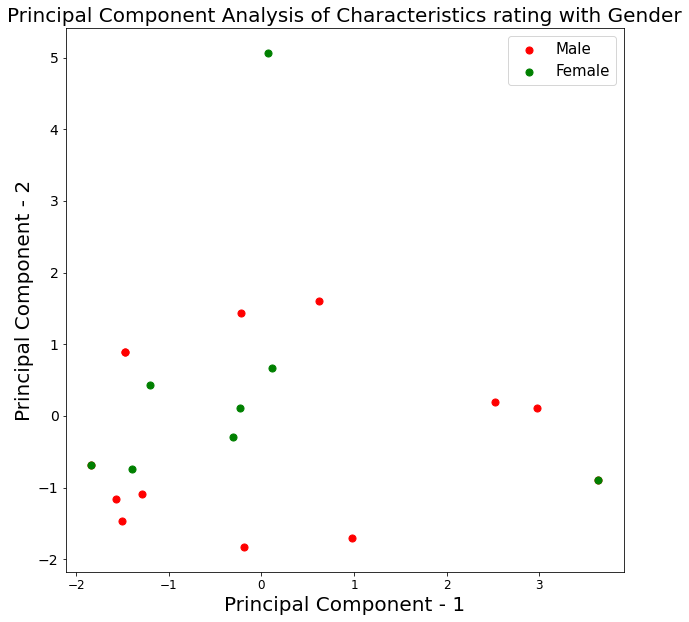

In [17]:
#plot
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Characteristics rating with Gender",fontsize=20)
targets = ['Male', 'Female']
colors = ['red', 'green']
for target, color in zip(targets,colors):
    indicesToKeep = df['Gender'] == target
    plt.scatter(principal_char_Df.loc[indicesToKeep, 'principal component 1']
                , principal_char_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})